In [ ]:
import os 
import sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
import seaborn 

In [ ]:
dataframe = pd.read_excel("data.xlsx") 
dataframe.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
print("Number of rows:", dataframe.shape[0])
print("Number of columns:", dataframe.shape[1])
print("Column names:", dataframe.columns.tolist())



Number of rows: 121502
Number of columns: 11
Column names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
dataframe.type.value_counts()

type
PAYMENT     47245
CASH_OUT    38092
CASH_IN     24645
TRANSFER    10370
DEBIT        1150
Name: count, dtype: int64

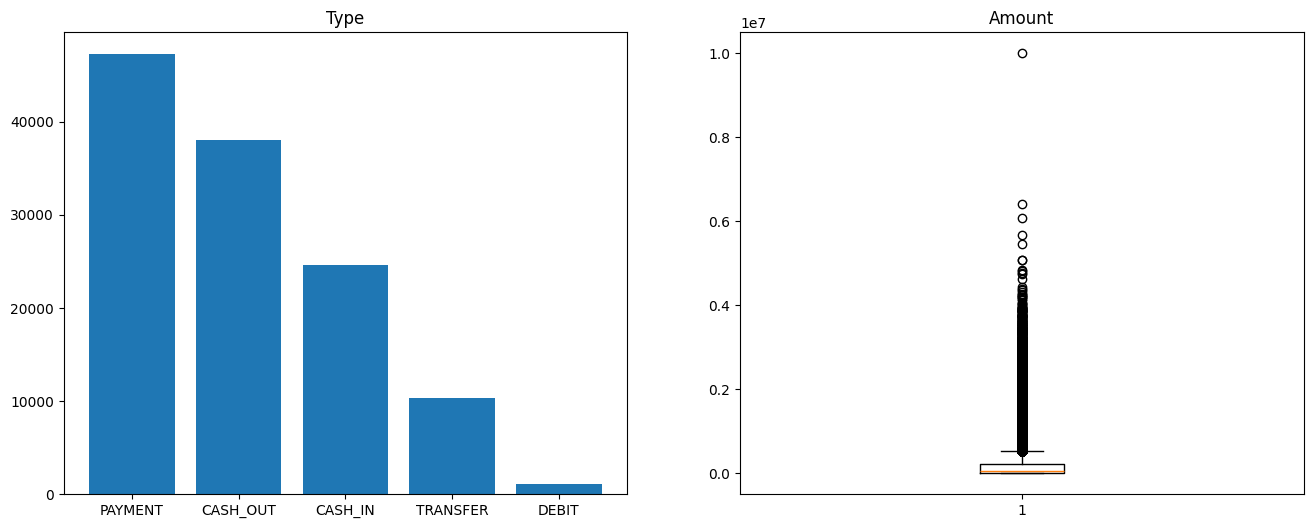

In [ ]:
x=dataframe["type"].value_counts().index
y=dataframe["type"].value_counts().values
f = plt.figure(1,figsize=(16,6))
ax1=f.add_subplot(1,2,1)
ax1.title.set_text("Type")
_=ax1.bar(x,y)

z=dataframe["amount"].value_counts().index
ax2 = f.add_subplot(1,2,2)
ax2.title.set_text("Amount")
_=ax2.boxplot(z)


In [ ]:
df=dataframe.copy()

In [ ]:
for col in df.columns: 
    if df[col].dtype=="object": 
        label_encoder = LabelEncoder() 
        df[col].fillna("None",inplace=True) 
        label_encoder.fit(list(df[col].astype(str).values))
        df[col]=label_encoder.transform(list(df[col].astype(str).values))
    else: 
        df[col].fillna(-999,inplace=True) 

C:\Users\Bhoomika S J\AppData\Local\Temp\ipykernel_22644\295788761.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(-999,inplace=True) #else we are filling our column with -999
C:\Users\Bhoomika S J\AppData\Local\Temp\ipykernel_22644\295788761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,14382,170136.0,160296.36,37805,0.0,0.0,0,0
1,1,3,1864.28,41684,21249.0,19384.72,39370,0.0,0.0,0,0


In [ ]:
from pmdarima import auto_arima 



In [ ]:
import pandas as pd
import statsmodels.tsa.stattools


dataframe = pd.read_excel("data.xlsx")


def isStationary(data, column='', maxval=0.05, series=False):
    if series:
        test = statsmodels.tsa.stattools.adfuller(data, autolag='AIC')
    else:
        test = statsmodels.tsa.stattools.adfuller(data[column], autolag='AIC')
    p = test[1]
    if p <= maxval:
        result = "It is Stationary"
    else:
        result = "It is Non-Stationary"
    return result


print(isStationary(dataframe, 'newbalanceOrig'))


It is Stationary


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


df = pd.read_excel("data.xlsx")


data = df['newbalanceOrig'].iloc[:5000] 


model = ARIMA(data, order=(5,1,0))  
model_fit = model.fit()


print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:         newbalanceOrig   No. Observations:                 5000
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -73914.200
Date:                Mon, 27 Oct 2025   AIC                         147840.401
Time:                        20:07:56   BIC                         147879.503
Sample:                             0   HQIC                        147854.106
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0423      0.017     -2.537      0.011      -0.075      -0.010
ar.L2         -0.0711      0.007    -10.739      0.000      -0.084      -0.058
ar.L3         -0.0189      0.017     -1.133      0.2

In [ ]:
processed_data = df 

In [ ]:
model_sarimax = statsmodels.api.tsa.statespace.SARIMAX(df['newbalanceOrig'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)#passing the parameters to our model SARIMAX
prediction = model_sarimax.fit() #fitting the model
print(prediction.summary().tables[1])#print our final result

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6914      0.029     23.525      0.000       0.634       0.749
ma.L1         -0.7501      0.027    -27.472      0.000      -0.804      -0.697
ar.S.L12      -0.0055      0.008     -0.664      0.507      -0.022       0.011
ma.S.L12      -0.9994      0.000  -4239.046      0.000      -1.000      -0.999
sigma2      7.301e+11   2.29e-12   3.19e+23      0.000     7.3e+11     7.3e+11


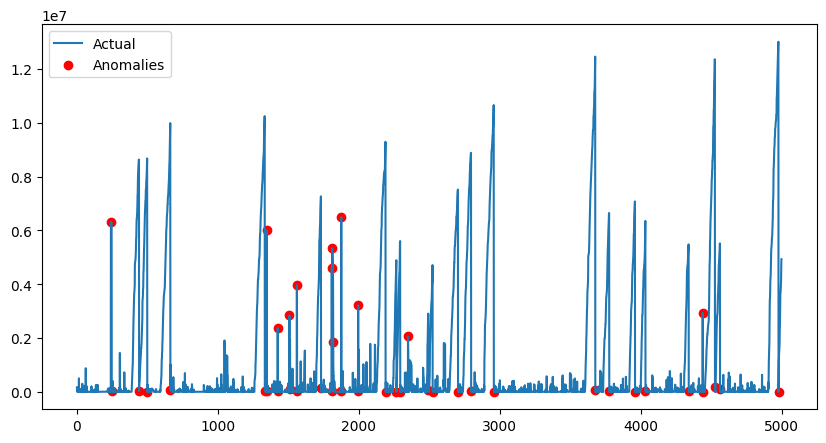

In [ ]:

residuals = data - fitted

threshold = 3 * residuals.std()

anomalies = data[abs(residuals) > threshold]

# Plot anomalies
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data, label='Actual')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.legend()
plt.show()
